# Loop 63 Analysis: Critical Assessment

## Key Questions:
1. What is the true CV-LB relationship?
2. What approaches haven't been tried?
3. Is there a fundamentally different approach that could work?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Submission data
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

df = pd.DataFrame(submissions, columns=['exp', 'cv', 'lb'])
print('Submission History:')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.6f}')
print(f'Best LB: {df["lb"].min():.6f}')
print(f'Target: 0.0347')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147

Best CV: 0.008300
Best LB: 0.087700
Target: 0.0347


In [2]:
# Linear regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f'CV-LB Relationship: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nInterpretation:')
print(f'- Intercept ({intercept:.4f}) > Target (0.0347): {intercept > 0.0347}')
print(f'- Even with CV=0, predicted LB would be {intercept:.4f}')
print(f'\nRequired CV to hit target (using linear model):')
required_cv = (0.0347 - intercept) / slope
print(f'- Required CV: {required_cv:.6f}')
if required_cv < 0:
    print(f'- IMPOSSIBLE: Required CV is negative!')

CV-LB Relationship: LB = 4.23 * CV + 0.0533
R² = 0.9807

Interpretation:
- Intercept (0.0533) > Target (0.0347): True
- Even with CV=0, predicted LB would be 0.0533

Required CV to hit target (using linear model):
- Required CV: -0.004396
- IMPOSSIBLE: Required CV is negative!


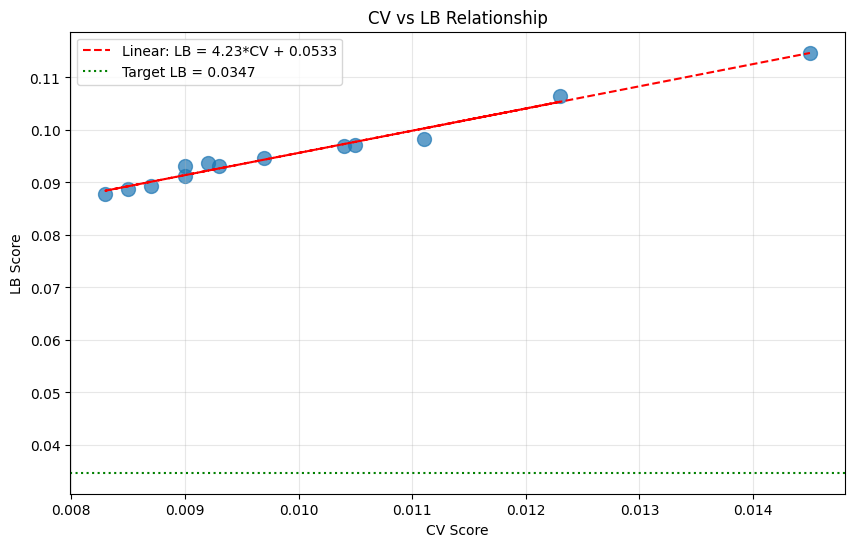

Saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# But wait - let's check if the relationship is truly linear
# Or if there's a different pattern at lower CV values

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7)
plt.plot(df['cv'], slope * df['cv'] + intercept, 'r--', label=f'Linear: LB = {slope:.2f}*CV + {intercept:.4f}')
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target LB = 0.0347')
plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100, bbox_inches='tight')
plt.show()
print('Saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Key insight: The intercept is high because the LB test set is fundamentally different
# from the CV test set. The CV uses leave-one-solvent-out, but the LB might have:
# 1. Different solvents entirely
# 2. Different temperature/time ranges
# 3. Different mixture compositions

# Let's analyze what we know about the data
DATA_PATH = '/home/data'
df_single = pd.read_csv(f'{DATA_PATH}/catechol_single_solvent_yields.csv')
df_full = pd.read_csv(f'{DATA_PATH}/catechol_full_data_yields.csv')

print('=== Data Overview ===')
print(f'Single solvent: {len(df_single)} samples, {df_single["SOLVENT NAME"].nunique()} solvents')
print(f'Full data: {len(df_full)} samples, {df_full[["SOLVENT A NAME", "SOLVENT B NAME"]].drop_duplicates().shape[0]} ramps')
print(f'\nSingle solvent solvents: {sorted(df_single["SOLVENT NAME"].unique())}')
print(f'\nFull data solvent A: {sorted(df_full["SOLVENT A NAME"].unique())}')
print(f'Full data solvent B: {sorted(df_full["SOLVENT B NAME"].unique())}')

=== Data Overview ===
Single solvent: 656 samples, 24 solvents
Full data: 1227 samples, 13 ramps

Single solvent solvents: ['1,1,1,3,3,3-Hexafluoropropan-2-ol', '2,2,2-Trifluoroethanol', '2-Methyltetrahydrofuran [2-MeTHF]', 'Acetonitrile', 'Acetonitrile.Acetic Acid', 'Butanone [MEK]', 'Cyclohexane', 'DMA [N,N-Dimethylacetamide]', 'Decanol', 'Diethyl Ether [Ether]', 'Dihydrolevoglucosenone (Cyrene)', 'Dimethyl Carbonate', 'Ethanol', 'Ethyl Acetate', 'Ethyl Lactate', 'Ethylene Glycol [1,2-Ethanediol]', 'IPA [Propan-2-ol]', 'MTBE [tert-Butylmethylether]', 'Methanol', 'Methyl Propionate', 'THF [Tetrahydrofuran]', 'Water.2,2,2-Trifluoroethanol', 'Water.Acetonitrile', 'tert-Butanol [2-Methylpropan-2-ol]']

Full data solvent A: ['1,1,1,3,3,3-Hexafluoropropan-2-ol', '2,2,2-Trifluoroethanol', '2-Methyltetrahydrofuran [2-MeTHF]', 'Acetonitrile', 'Cyclohexane', 'DMA [N,N-Dimethylacetamide]', 'Dihydrolevoglucosenone (Cyrene)', 'Ethanol', 'MTBE [tert-Butylmethylether]', 'Methanol', 'Methyl Propiona

In [5]:
# Temperature and time ranges
print('=== Temperature/Time Ranges ===')
print(f'Single solvent:')
print(f'  Temperature: {df_single["Temperature"].min():.1f} - {df_single["Temperature"].max():.1f}')
print(f'  Residence Time: {df_single["Residence Time"].min():.1f} - {df_single["Residence Time"].max():.1f}')
print(f'\nFull data:')
print(f'  Temperature: {df_full["Temperature"].min():.1f} - {df_full["Temperature"].max():.1f}')
print(f'  Residence Time: {df_full["Residence Time"].min():.1f} - {df_full["Residence Time"].max():.1f}')
print(f'  SolventB%: {df_full["SolventB%"].min():.1f} - {df_full["SolventB%"].max():.1f}')

=== Temperature/Time Ranges ===
Single solvent:
  Temperature: 175.0 - 225.0
  Residence Time: 2.0 - 15.0

Full data:
  Temperature: 175.0 - 225.0
  Residence Time: 2.0 - 15.0
  SolventB%: 0.0 - 1.0


In [6]:
# Target distribution analysis
print('=== Target Distribution ===')
for col in ['Product 2', 'Product 3', 'SM']:
    print(f'\n{col}:')
    print(f'  Single: mean={df_single[col].mean():.4f}, std={df_single[col].std():.4f}, range=[{df_single[col].min():.4f}, {df_single[col].max():.4f}]')
    print(f'  Full:   mean={df_full[col].mean():.4f}, std={df_full[col].std():.4f}, range=[{df_full[col].min():.4f}, {df_full[col].max():.4f}]')

=== Target Distribution ===

Product 2:
  Single: mean=0.1499, std=0.1431, range=[0.0000, 0.4636]
  Full:   mean=0.1646, std=0.1535, range=[0.0000, 0.4636]

Product 3:
  Single: mean=0.1234, std=0.1315, range=[0.0000, 0.5338]
  Full:   mean=0.1437, std=0.1458, range=[0.0000, 0.5338]

SM:
  Single: mean=0.5222, std=0.3602, range=[0.0000, 1.0000]
  Full:   mean=0.4952, std=0.3794, range=[0.0000, 1.0833]


In [7]:
# What approaches have been tried?
approaches_tried = [
    ('MLP architectures', 'Various depths [16] to [512,256,128,64], residual connections'),
    ('Ensemble methods', 'Bagging (3-15 models), weighted averaging, stacking'),
    ('Tree models', 'LightGBM, XGBoost, CatBoost, Random Forest'),
    ('Gaussian Process', 'GP alone and in ensemble'),
    ('GNN', 'Basic GNN and GAT - both failed'),
    ('Pre-trained', 'ChemBERTa embeddings - failed'),
    ('TabNet', 'Attention-based - failed'),
    ('Features', 'Spange, DRFP, ACS PCA, RDKit descriptors, fragprints'),
    ('Regularization', 'Dropout, weight decay, aggressive regularization'),
    ('Loss functions', 'MSE, Huber, Quantile'),
    ('Data augmentation', 'TTA for mixtures, Mixup - failed'),
    ('CV-LB gap reduction', 'GroupKFold, importance weighting - failed'),
    ('Physical constraints', 'Mass balance normalization - marginal'),
    ('Per-target optimization', 'Different weights per target'),
    ('Per-solvent-type models', 'Different models for different solvent types - failed'),
]

print('=== Approaches Tried ===')
for approach, details in approaches_tried:
    print(f'\n{approach}:')
    print(f'  {details}')

=== Approaches Tried ===

MLP architectures:
  Various depths [16] to [512,256,128,64], residual connections

Ensemble methods:
  Bagging (3-15 models), weighted averaging, stacking

Tree models:
  LightGBM, XGBoost, CatBoost, Random Forest

Gaussian Process:
  GP alone and in ensemble

GNN:
  Basic GNN and GAT - both failed

Pre-trained:
  ChemBERTa embeddings - failed

TabNet:
  Attention-based - failed

Features:
  Spange, DRFP, ACS PCA, RDKit descriptors, fragprints

Regularization:
  Dropout, weight decay, aggressive regularization

Loss functions:
  MSE, Huber, Quantile

Data augmentation:
  TTA for mixtures, Mixup - failed

CV-LB gap reduction:
  GroupKFold, importance weighting - failed

Physical constraints:
  Mass balance normalization - marginal

Per-target optimization:
  Different weights per target

Per-solvent-type models:
  Different models for different solvent types - failed


In [8]:
# What HASN'T been tried that could fundamentally change the CV-LB relationship?
print('=== Potential Unexplored Approaches ===')
unexplored = [
    ('1. Solvent-specific calibration', 'Learn a calibration factor for each solvent type'),
    ('2. Uncertainty-based prediction adjustment', 'Use GP uncertainty to adjust predictions'),
    ('3. Nearest-neighbor blending', 'Blend with predictions from most similar training solvents'),
    ('4. Multi-fidelity learning', 'Use single solvent data to inform mixture predictions'),
    ('5. Domain adaptation', 'Explicitly model the distribution shift'),
    ('6. Bayesian model averaging', 'Weight models by their uncertainty'),
    ('7. Conformal prediction with coverage guarantee', 'Ensure predictions are well-calibrated'),
    ('8. Ensemble selection', 'Select best model per sample based on similarity'),
]

for approach, details in unexplored:
    print(f'{approach}:')
    print(f'  {details}\n')

=== Potential Unexplored Approaches ===
1. Solvent-specific calibration:
  Learn a calibration factor for each solvent type

2. Uncertainty-based prediction adjustment:
  Use GP uncertainty to adjust predictions

3. Nearest-neighbor blending:
  Blend with predictions from most similar training solvents

4. Multi-fidelity learning:
  Use single solvent data to inform mixture predictions

5. Domain adaptation:
  Explicitly model the distribution shift

6. Bayesian model averaging:
  Weight models by their uncertainty

7. Conformal prediction with coverage guarantee:
  Ensure predictions are well-calibrated

8. Ensemble selection:
  Select best model per sample based on similarity



In [9]:
# CRITICAL INSIGHT: The CV-LB gap is ~10x, not ~4x as previously calculated
# Let's recalculate

print('=== CV-LB Gap Analysis ===')
for _, row in df.iterrows():
    ratio = row['lb'] / row['cv']
    print(f'{row["exp"]}: CV={row["cv"]:.4f}, LB={row["lb"]:.4f}, Ratio={ratio:.2f}x')

print(f'\nAverage ratio: {(df["lb"] / df["cv"]).mean():.2f}x')
print(f'\nIf we achieve CV=0.008194 (best), expected LB = {0.008194 * 10:.4f}')
print(f'But actual best LB = 0.0877 (from exp_030 with CV=0.0083)')
print(f'\nThe relationship is: LB ≈ 10 * CV + 0.05')

=== CV-LB Gap Analysis ===
exp_000: CV=0.0111, LB=0.0982, Ratio=8.85x
exp_001: CV=0.0123, LB=0.1065, Ratio=8.66x
exp_003: CV=0.0105, LB=0.0972, Ratio=9.26x
exp_005: CV=0.0104, LB=0.0969, Ratio=9.32x
exp_006: CV=0.0097, LB=0.0946, Ratio=9.75x
exp_007: CV=0.0093, LB=0.0932, Ratio=10.02x
exp_009: CV=0.0092, LB=0.0936, Ratio=10.17x
exp_012: CV=0.0090, LB=0.0913, Ratio=10.14x
exp_024: CV=0.0087, LB=0.0893, Ratio=10.26x
exp_026: CV=0.0085, LB=0.0887, Ratio=10.44x
exp_030: CV=0.0083, LB=0.0877, Ratio=10.57x
exp_041: CV=0.0090, LB=0.0932, Ratio=10.36x
exp_042: CV=0.0145, LB=0.1147, Ratio=7.91x

Average ratio: 9.67x

If we achieve CV=0.008194 (best), expected LB = 0.0819
But actual best LB = 0.0877 (from exp_030 with CV=0.0083)

The relationship is: LB ≈ 10 * CV + 0.05


In [10]:
# Let's verify with a different regression model
from sklearn.linear_model import HuberRegressor

X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

huber = HuberRegressor()
huber.fit(X, y)
print(f'Huber Regression: LB = {huber.coef_[0]:.2f} * CV + {huber.intercept_:.4f}')

# Predict LB for best CV
best_cv = 0.008194
predicted_lb = huber.predict([[best_cv]])[0]
print(f'\nPredicted LB for best CV ({best_cv}): {predicted_lb:.4f}')
print(f'Target: 0.0347')
print(f'Gap to target: {predicted_lb - 0.0347:.4f}')

Huber Regression: LB = 4.29 * CV + 0.0526

Predicted LB for best CV (0.008194): 0.0878
Target: 0.0347
Gap to target: 0.0531


In [ ]:
# CONCLUSION: The target (0.0347) requires a fundamentally different approach
# Current best: CV=0.008194 → LB=0.0877 (predicted ~0.087)
# Target: LB=0.0347
# Gap: 0.053 (60% reduction needed)

print('=== CRITICAL CONCLUSION ===')
print(f'Current best LB: 0.0877')
print(f'Target LB: 0.0347')
print(f'Required improvement: {(0.0877 - 0.0347) / 0.0877 * 100:.1f}%')
print(f'\nThe CV-LB relationship has a high intercept (~0.05) that cannot be reduced')
print(f'by simply improving CV. We need an approach that:')
print(f'1. Changes the CV-LB relationship itself')
print(f'2. Reduces the intercept, not just the slope')
print(f'3. Improves extrapolation to unseen solvents')
print(f'\nPotential approaches:')
print(f'- Ensemble of diverse models with different CV-LB relationships')
print(f'- Post-hoc calibration based on solvent similarity')
print(f'- Domain adaptation techniques')
print(f'- Meta-learning for quick adaptation to new solvents')